In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('C:/Users/Tarun/Downloads/python/SPIKEX/DATASET.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
data.shape

(7043, 21)

In [4]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [5]:
# Columns suitable for conversion to categorical
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Convert each column to a categorical
for col in categorical_cols:
    data[col] = data[col].astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [7]:
data.duplicated().sum()

0

In [8]:
# info about categorical variables
data.describe(include="category")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


# Using Label Encoder for Categorical Variables

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object','category']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# If there are numerical features then apply Scaling(Starnard Scaler)

In [12]:
from sklearn.preprocessing import StandardScaler
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
if not numerical_features.empty:
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
else:
    print("No numerical features found in the dataset.")

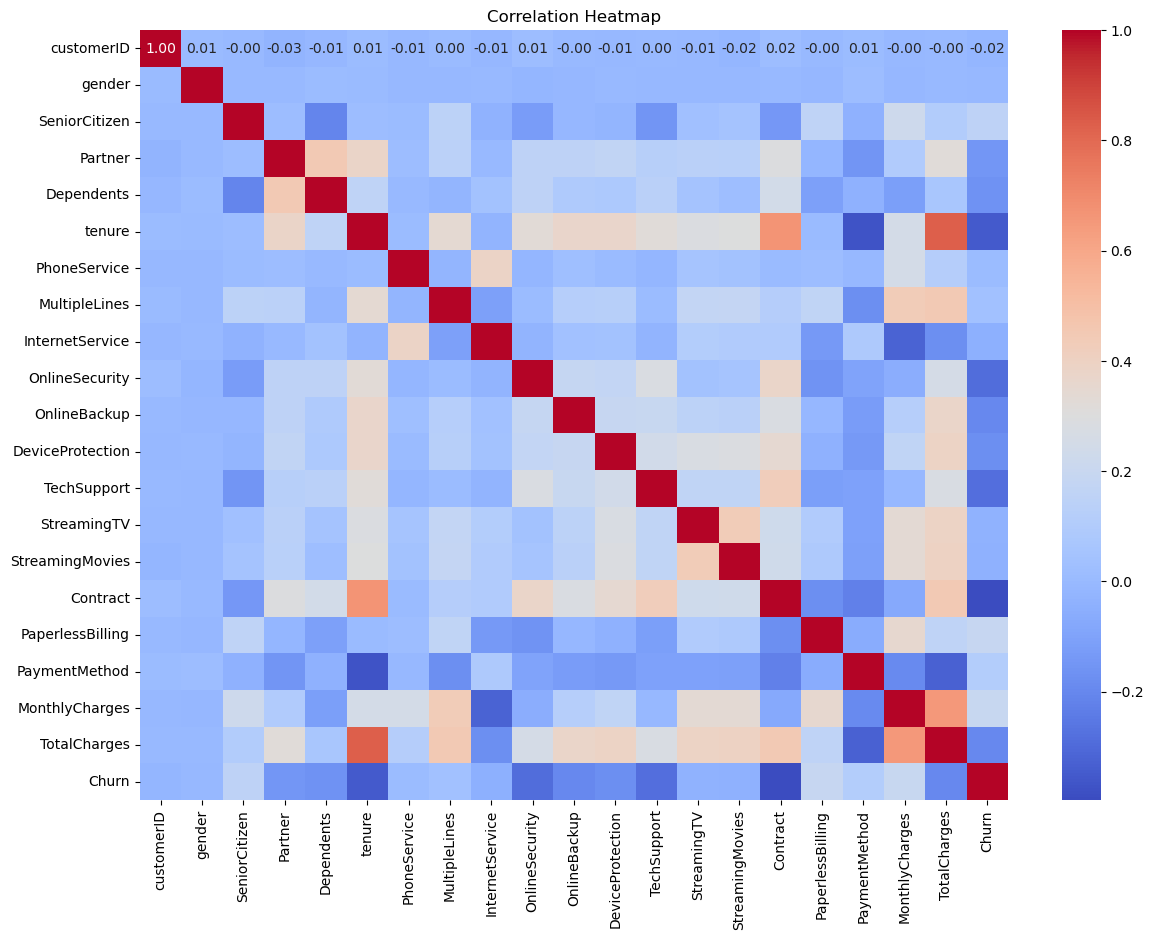

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
# Define custom colors
light_grey_color = '#D3D3D3'
light_red_color = '#FF7F7F'
light_green_color = '#BDFCC9'
violet_color = '#EE82EE'
# Create a color palette for pie charts
palette = [light_grey_color, light_red_color, light_green_color, violet_color]


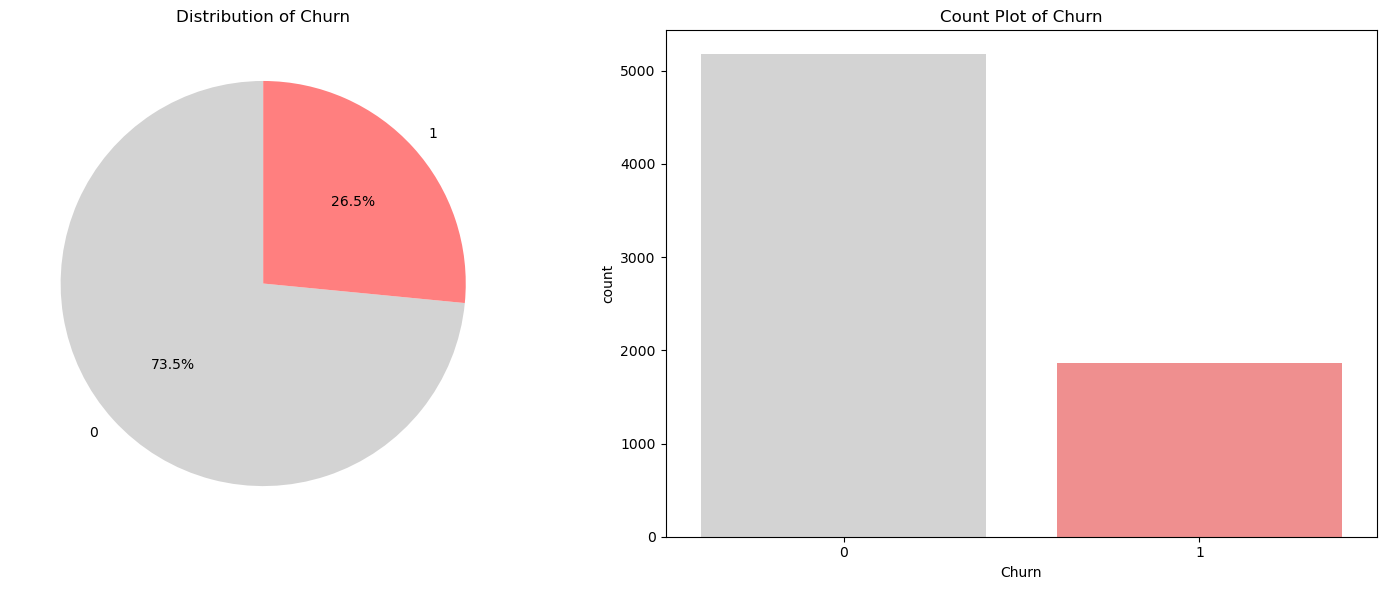

In [15]:
# Distribution of Churn-
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
status_counts = data['Churn'].value_counts()
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=[light_grey_color, light_red_color])
axes[0].set_title('Distribution of Churn')
sns.countplot(x='Churn', data=data, palette=[light_grey_color, light_red_color], ax=axes[1])
axes[1].set_title('Count Plot of Churn')

plt.tight_layout()
plt.show()

In [16]:
# DIVIDE Categorical Columns in Listist to plot them.
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
            "StreamingMovies"]
billing_info = ["Contract", "PaperlessBilling", "PaymentMethod"]
customer_info = ["gender", "SeniorCitizen", "Partner", "Dependents"]

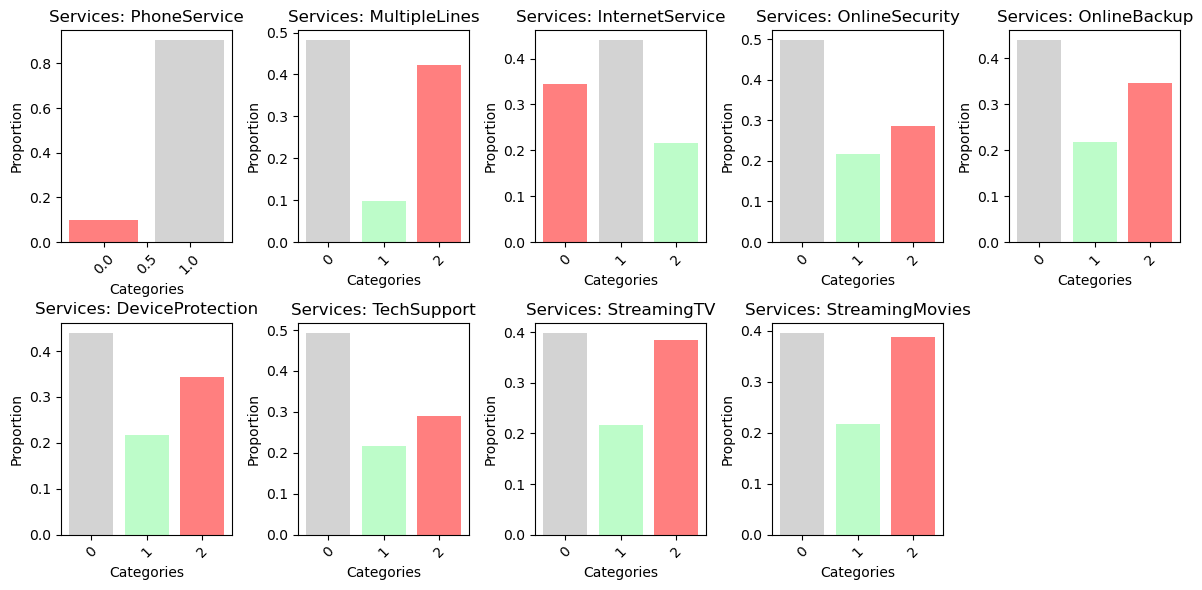

In [17]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(services, 1):
    plt.subplot(2, 5, i)
    counts = data[col].value_counts(normalize=True)
    plt.bar(counts.index, counts, color=palette)
    plt.title(f'Services: {col}')
    plt.ylabel('Proportion')
    plt.xlabel('Categories')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


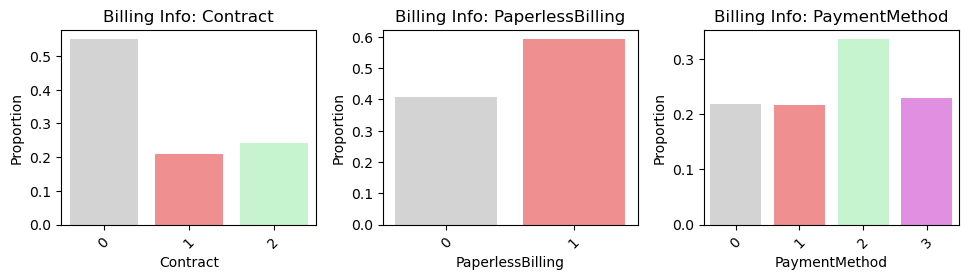

In [18]:
plt.figure(figsize=(13, 5))
for i, col in enumerate(billing_info, 1):
    plt.subplot(2, 4, i)
    if col in ['MonthlyCharges', 'TotalCharges', 'tenure']:
        sns.histplot(df[col], kde=True, color=light_blue_color)
        plt.title(f'Billing Info: {col}')
    else:
        counts = data[col].value_counts(normalize=True)
        sns.barplot(x=counts.index, y=counts.values, palette=palette)
        plt.title(f'Billing Info: {col}')
        plt.xlabel(col)
        plt.ylabel('Proportion')
        plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


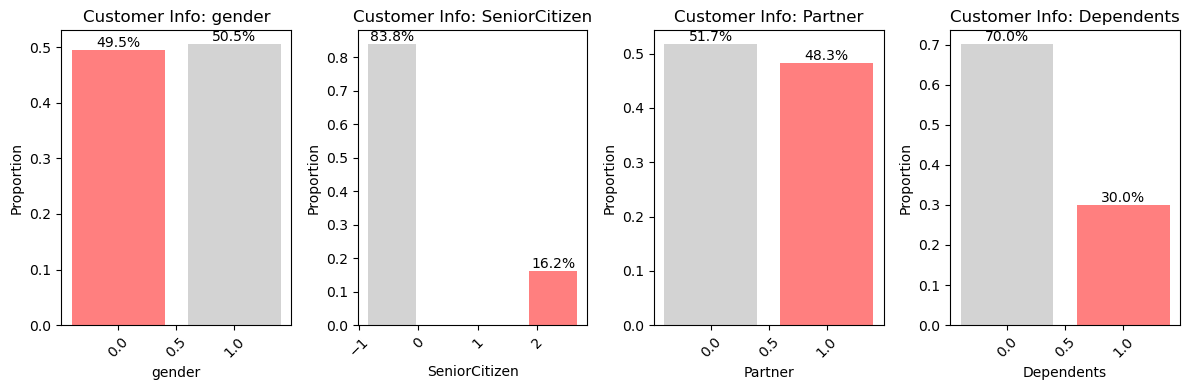

In [19]:

plt.figure(figsize=(12, 4))  # Adjusted the figure size for better spacing
for i, col in enumerate(customer_info, 1):
    plt.subplot(1, 4, i)
    counts = data[col].value_counts(normalize=True)
    bars = plt.bar(counts.index, counts, color=palette)
    plt.title(f'Customer Info: {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height,
                 f'{height:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



C:\Users\Tarun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tarun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tarun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


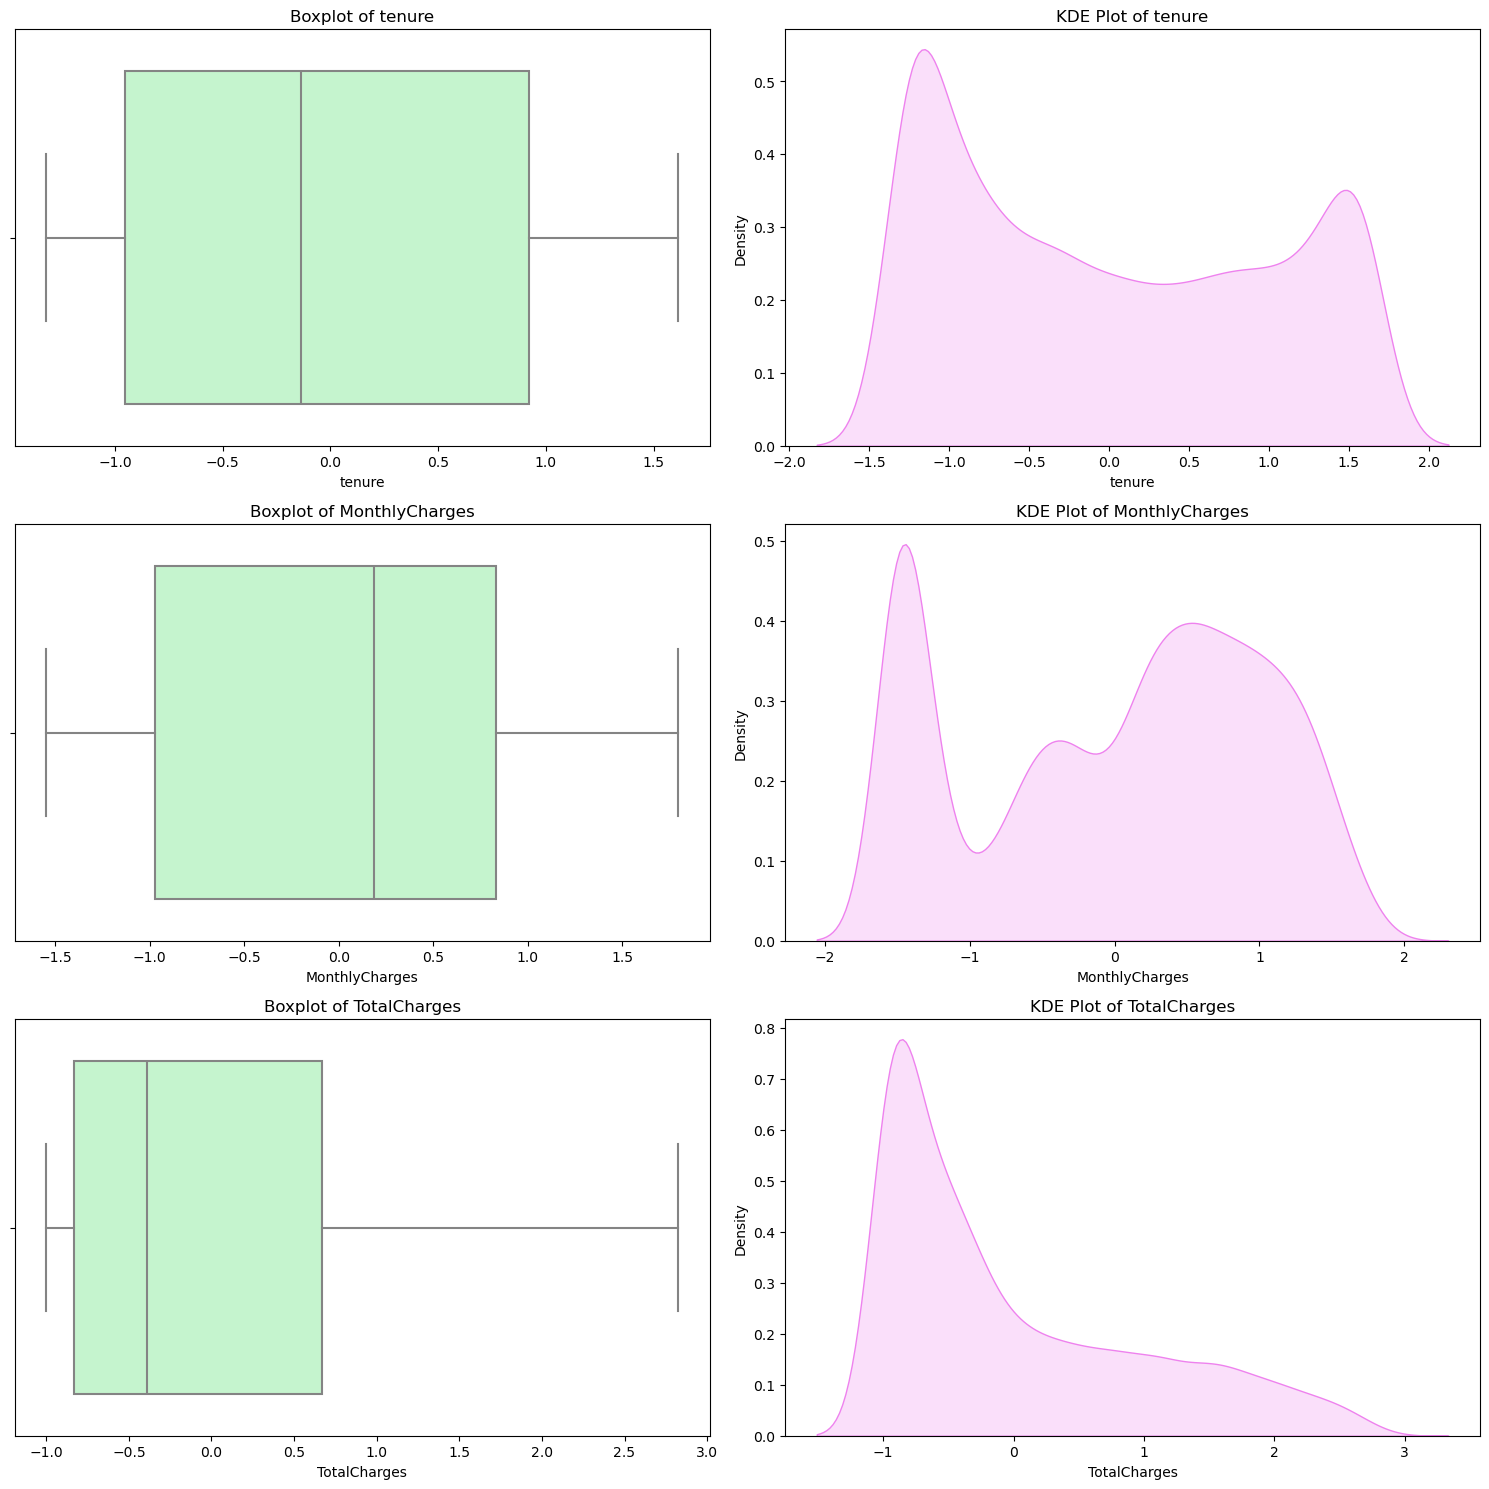

In [20]:
# Define numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

num_rows = len(numeric_cols)
num_cols = 2 

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)
for i, column in enumerate(numeric_cols):
    # Box plot
    sns.boxplot(x=data[column], ax=axes[i, 0], color=light_green_color)
    axes[i, 0].set_title(f'Boxplot of {column}')
    axes[i, 0].set_xlabel(column)
    # KDE plot
    sns.kdeplot(data=data[column], ax=axes[i, 1], color=violet_color, fill=True)
    axes[i, 1].set_title(f'KDE Plot of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

# Different Machine Learning Algorithm

In [22]:
from sklearn.model_selection import train_test_split
# Creating new features
data['TotalCharges'] = data['MonthlyCharges'] * data['tenure']

# Update features and target after feature engineering
X = data.drop(columns=['Churn'])
y = data['Churn']


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and Training 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate model
roc_auc = roc_auc_score(y_test, lr_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1_score = f1_score(y_test, lr_predictions)

# Print evaluation metrics
print("Logistic Regression Model Performance:")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1_score}")


Logistic Regression Model Performance:
ROC AUC: 0.74
Accuracy: 0.8105039034776437
Precision: 0.6586826347305389
Recall: 0.5898123324396782
F1 Score: 0.6223479490806223


C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and Training 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate model
rf_accuracy = accuracy_score(y_test, rf_predictions)
roc_auc = roc_auc_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)

# Print evaluation metrics
print("Random Forest Model Performance:")
print(f"Accuracy: {rf_accuracy}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1_score}")


Random Forest Model Performance:
Accuracy: 0.7934705464868701
ROC AUC: 0.70
Precision: 0.6433566433566433
Recall: 0.4932975871313673
F1 Score: 0.5584218512898331


# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and Training 
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate model
dt_accuracy = accuracy_score(y_test, dt_predictions)
roc_auc = roc_auc_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions)

# Print evaluation metrics
print("Decision Tree Model Performance:")
print(f"Accuracy: {dt_accuracy}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1_score}")


Decision Tree Model Performance:
Accuracy: 0.7295954577714692
ROC AUC: 0.66
Precision: 0.4895833333333333
Recall: 0.5040214477211796
F1 Score: 0.4966974900924702


# KNeighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and Training 
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Evaluate model
knn_accuracy = accuracy_score(y_test, knn_predictions)
roc_auc = roc_auc_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1_score = f1_score(y_test, knn_predictions)

# Print evaluation metrics
print("K-Nearest Neighbors Model Performance:")
print(f"Accuracy: {knn_accuracy}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1_score}")


K-Nearest Neighbors Model Performance:
Accuracy: 0.6997870830376153
ROC AUC: 0.54
Precision: 0.3684210526315789
Recall: 0.1876675603217158
F1 Score: 0.2486678507992895


# Gradient Boosting Classifier (Giving Best Result)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and Training 
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Evaluate model
gb_accuracy = accuracy_score(y_test, gb_predictions)
roc_auc = roc_auc_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1_score = f1_score(y_test, gb_predictions)

# Print evaluation metrics
print("Gradient Boosting Model Performance:")
print(f"Accuracy: {gb_accuracy}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Precision: {gb_precision}")
print(f"Recall: {gb_recall}")
print(f"F1 Score: {gb_f1_score}")


Gradient Boosting Model Performance:
Accuracy: 0.8197303051809794
ROC AUC: 0.73
Precision: 0.7044673539518901
Recall: 0.5495978552278821
F1 Score: 0.6174698795180723
